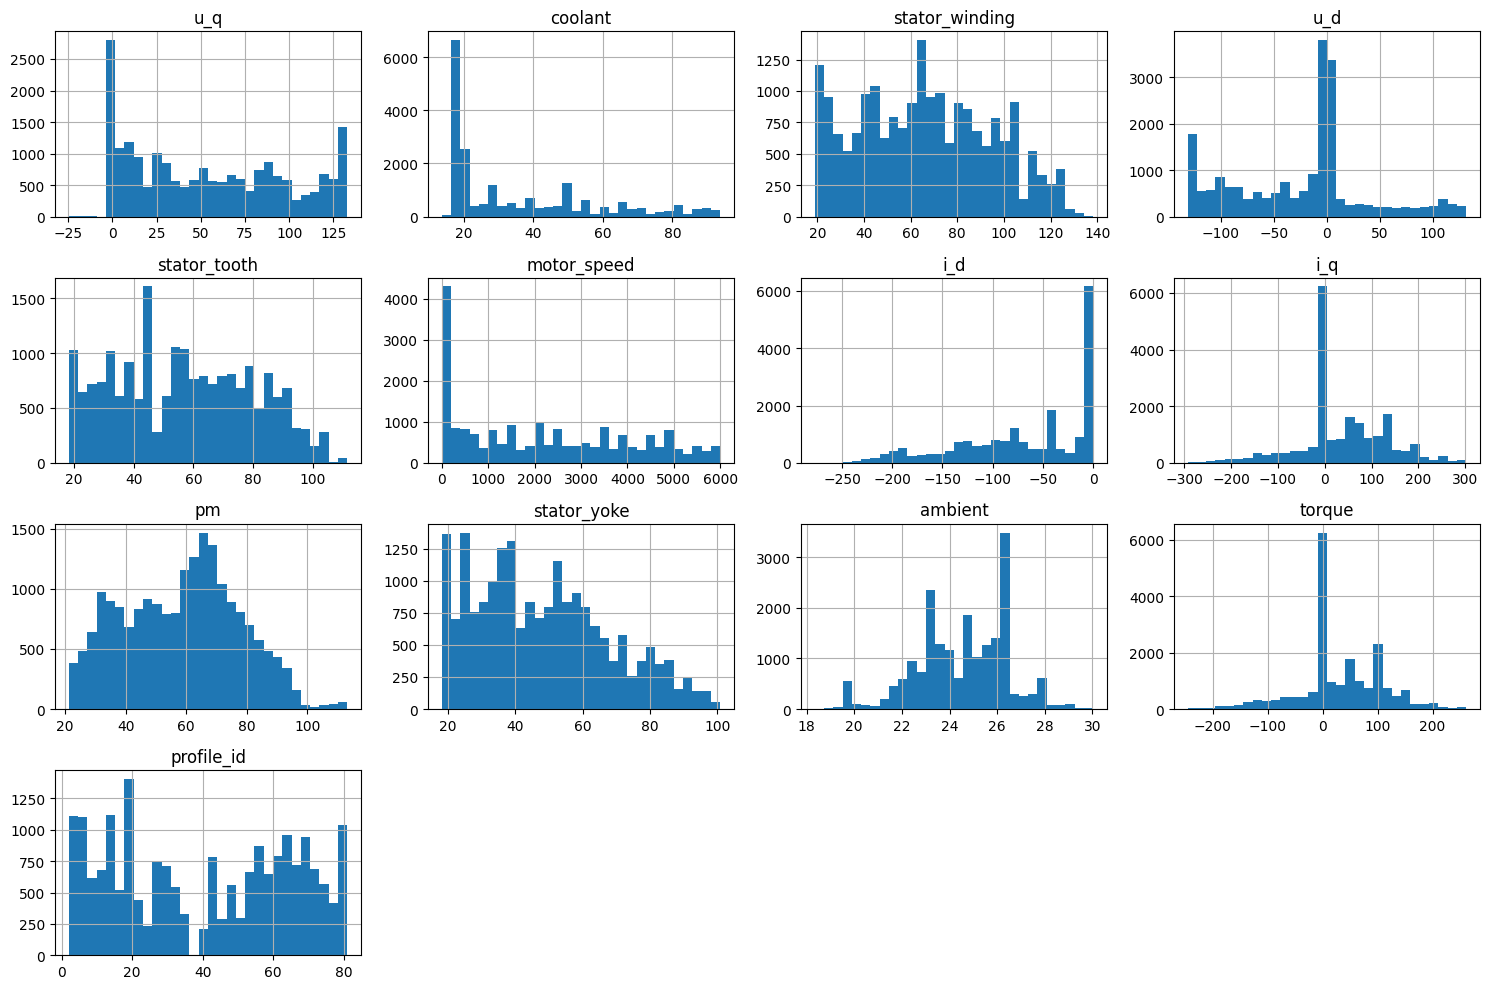

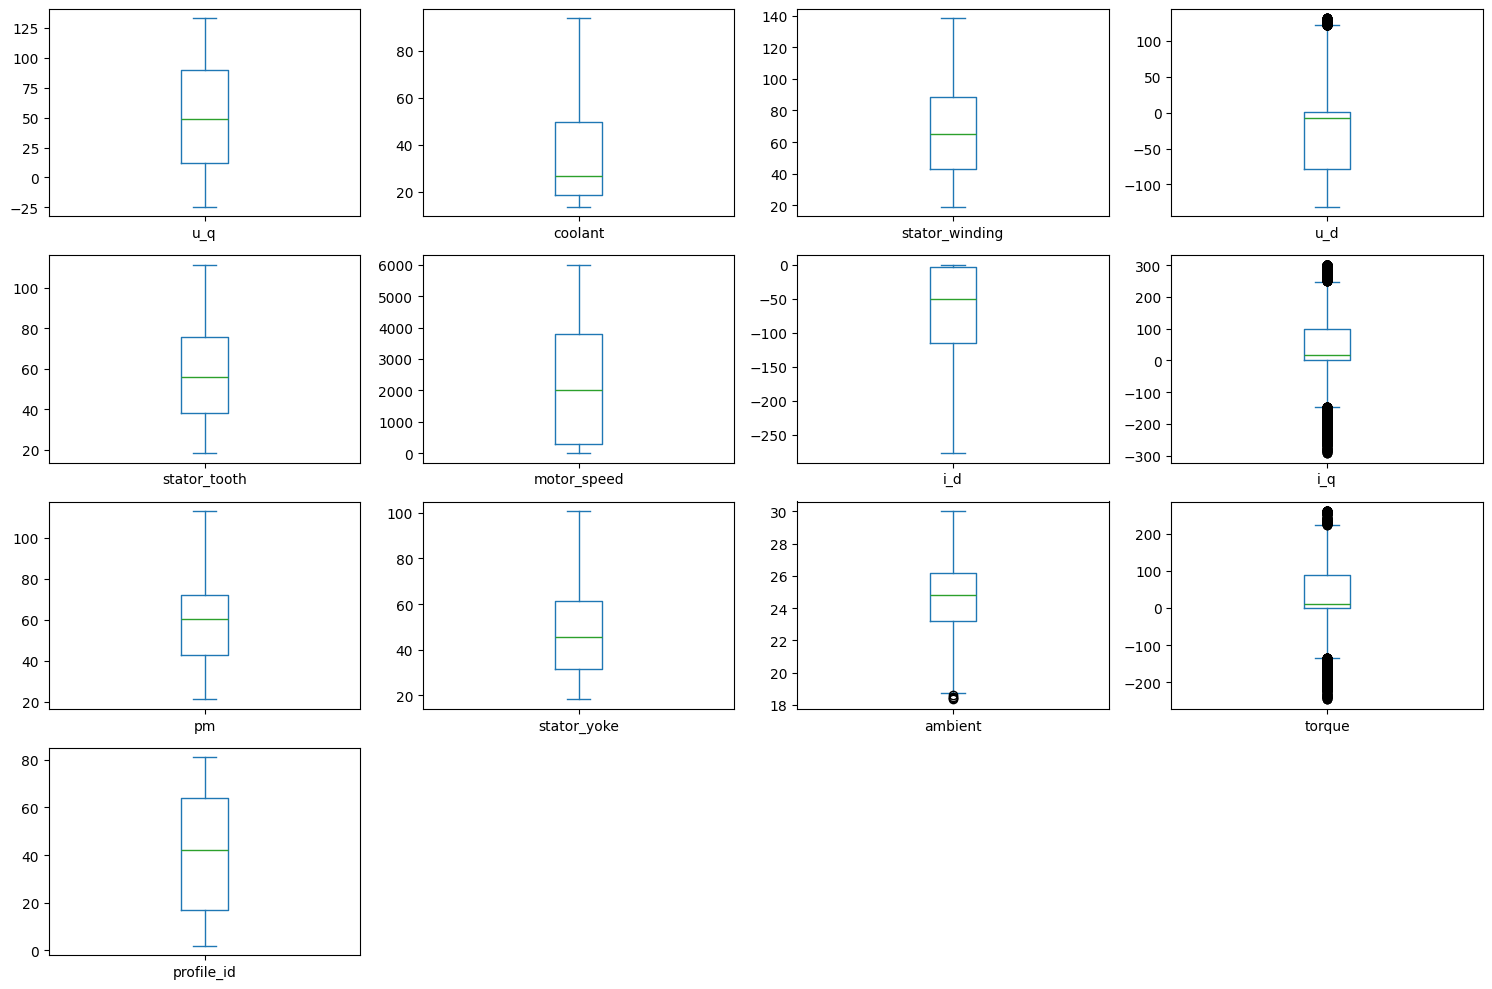

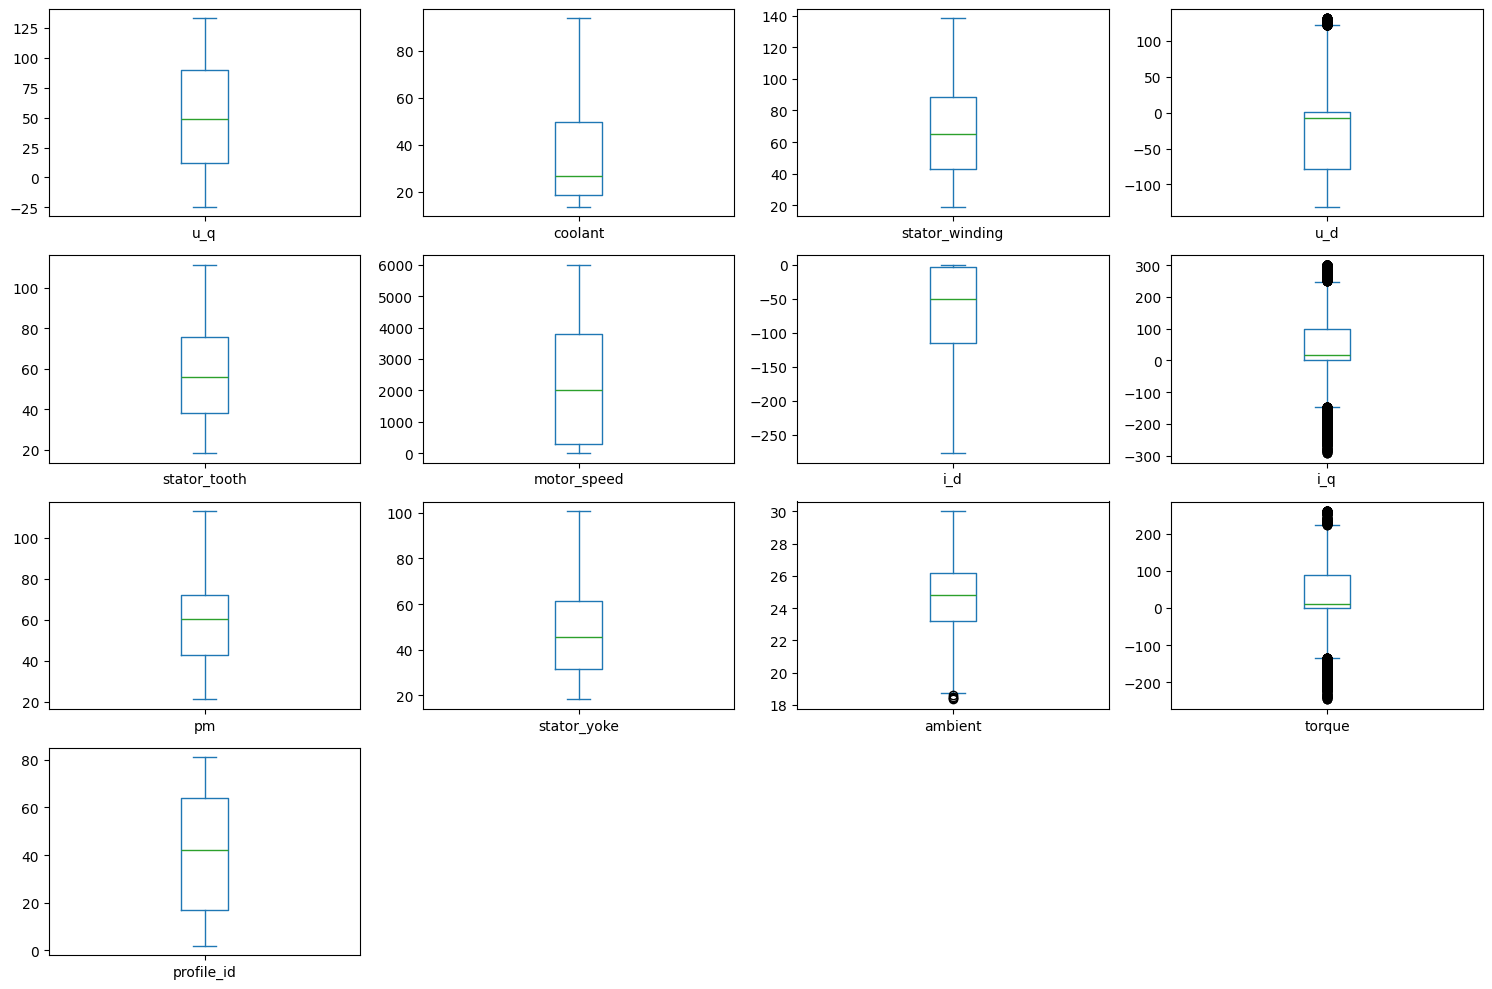

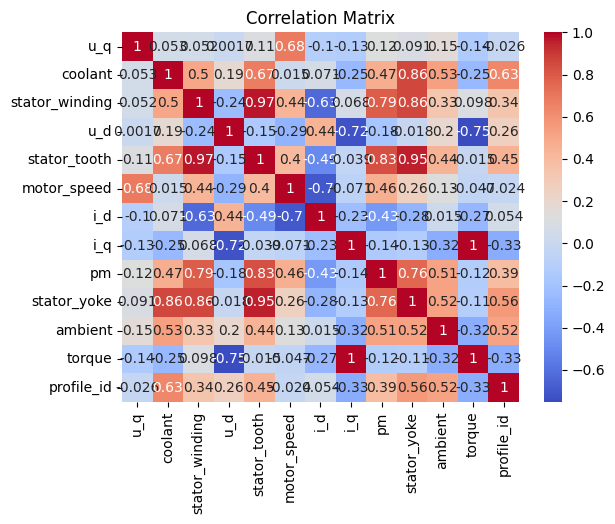

                u_q       coolant  stator_winding           u_d  stator_tooth  \
count  20000.000000  20000.000000    20000.000000  20000.000000  20000.000000   
mean      54.139733     36.096669       66.310653    -24.703910     56.815142   
std       44.010353     21.714242       28.725026     63.265210     22.979402   
min      -24.653072     13.592314       18.884970   -131.414703     18.245605   
25%       12.073068     18.695028       42.776730    -78.616305     38.367294   
50%       48.940296     26.751846       65.147423     -7.581108     55.902582   
75%       89.347072     49.833199       88.460461      1.471562     75.519179   
max      132.832276     93.741243      138.268539    131.386597    111.494465   

        motor_speed           i_d           i_q            pm   stator_yoke  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean    2200.014587    -68.608655     36.948496     58.490477     48.100294   
std     1862.576787     64.885197

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os


df = pd.read_csv(r'C:\Users\ketan sonawane\Desktop\ThermoPredictor\data.csv')


# exploring the data
df.head(10)

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


    # Distribution plot
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

    # Boxplot for all features
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False)
plt.tight_layout()
plt.show()

## Multivariate analysis

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## descriptive analysis
print(df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())







In [45]:
# droping unwanted features

df = df.drop(columns=['profile_id'])  # Drop unwanted column

# Remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


# applying feature scaling for it

scaler = StandardScaler()
X = df.drop('pm', axis=1)  # Features
y = df['pm']               # Target
X_scaled = scaler.fit_transform(X)

# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=18)




In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
linearR_model = LinearRegression()
linearR_model.fit(X_train, y_train)
lr_pred = linearR_model.predict(X_test)
print("Linear Regression:")
print("  MSE:", mean_squared_error(y_test, lr_pred))
print("  R² :", r2_score(y_test, lr_pred))


Linear Regression:
  MSE: 54.41373958737465
  R² : 0.8575868667936581


In [48]:
# Model 2: Decision Tree Regressor
DT_model = DecisionTreeRegressor(random_state=0)
DT_model.fit(X_train, y_train)
dt_pred = DT_model.predict(X_test)
print("Decision Tree:")
print("  MSE:", mean_squared_error(y_test, dt_pred))
print("  R² :", r2_score(y_test, dt_pred))



Decision Tree:
  MSE: 28.33437525316917
  R² : 0.925842495152009


In [55]:

# Model 3: Random Forest Regressor
RF_model = RandomForestRegressor(n_estimators=15, random_state=0)
RF_model.fit(X_train, y_train)
rf_pred = RF_model.predict(X_test)
print("Random Forest:")
print("  MSE:", mean_squared_error(y_test, rf_pred))
print("  R² :", r2_score(y_test, rf_pred))



Random Forest:
  MSE: 14.104083927775175
  R² : 0.9630864043090742


In [56]:
import os
import joblib


root_model_path = os.path.abspath(os.path.join(os.getcwd(), "..", "model"))
os.makedirs(root_model_path, exist_ok=True)

joblib.dump(RF_model, os.path.join(root_model_path, "model.save"))
print("Model saved at:", os.path.join(root_model_path, "model.save"))

joblib.dump(scaler, os.path.join(root_model_path, "scaler.save"))



Model saved at: c:\Users\ketan sonawane\Desktop\ThermoPredictor\model\model.save


['c:\\Users\\ketan sonawane\\Desktop\\ThermoPredictor\\model\\scaler.save']

In [57]:
X.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'stator_yoke', 'ambient', 'torque'],
      dtype='object')